In [7]:
path = "ch02/usagov_bitly_data2012-03-16-1331923249.txt"

In [8]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [9]:
import json

In [10]:
records = [json.loads(line) for line in open(path)]

In [11]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) 
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts2(time_zones)

In [ ]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [ ]:
top_counts(counts)

In [ ]:
from collections import Counter

counts = Counter(time_zones)

counts.most_common(10)

In [ ]:
from pandas import DataFrame, Series

In [ ]:
import pandas as pd

In [ ]:
frame = DataFrame(records)

In [ ]:
frame['tz'][:10]

In [ ]:
tz_counts = frame.tz.value_counts()

In [ ]:
tz_counts[:10]

In [ ]:
clean_tz = frame['tz'].fillna('Missing') # I don't see what the purpose of 'Missing' here

In [ ]:
clean_tz[clean_tz==''] ='Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

In [ ]:
# %load my_imports.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
import time

import json



In [ ]:
tz_counts[:10].plot(kind = 'barh', rot = 0)
plt.show()

In [ ]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [ ]:
results[:5]

In [ ]:
results.value_counts()[:9]

In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
operating_system =np.where(cframe['a'].str.contains('Windows'), 
                           'Windows', 'Not Windows') # np.where 1st: list, 2 & 3 -> x & y (choose one)

In [ ]:
by_tz_os = cframe.groupby(['tz', operating_system]) # a bit lost

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [ ]:
agg_counts[:10]

In [ ]:
indexer = agg_counts.sum(1).argsort()

In [ ]:
indexer[:10]

In [ ]:
count_subset =agg_counts.take(indexer)[-10:]

In [ ]:
count_subset

In [ ]:
count_subset.plot(kind='barh', stacked=True)
plt.show()

In [ ]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)
normed_subset.plot(kind='barh', stacked = True)
plt.show()

In [ ]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None,
names=unames)

In [12]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None,
names=unames)
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens//ratings.dat', sep='::', header=None,
names=rnames)
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens//movies.dat', sep='::', header=None,
names=mnames)

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [14]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [16]:
ratings.describe()

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [17]:
data = pd.merge(pd.merge(ratings, users), movies)

In [19]:
data.describe()

,user_id,movie_id,rating,timestamp,age,occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [20]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [21]:
ratings_by_title = data.groupby("title").size()

In [23]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [24]:
active_titles = ratings_by_title.index[ratings_by_title > 250]

In [25]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1214)

In [30]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [31]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [32]:
mean_ratings = mean_ratings.ix[active_titles]

In [37]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending = False)

In [38]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [39]:
mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']

In [41]:
sort_by_diff = mean_ratings.sort_values(by = 'diff', ascending=False)

In [43]:
sort_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


In [45]:
sort_by_diff[::-1][:10] # Reverse order of rows

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


In [46]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [47]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [48]:
rating_std_by_title.order(ascending=False)[:10]

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [49]:
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])

In [50]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [51]:
years = range(1880, 2011)

In [52]:
columns = ['name', 'sex', 'births']

pieces = []

In [55]:
for year in years:
    path = 'ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [57]:
names = pd.concat(pieces, ignore_index=True)

In [58]:
names.head(3)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880


In [77]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [78]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [79]:
total_births.plot(title='TOT')

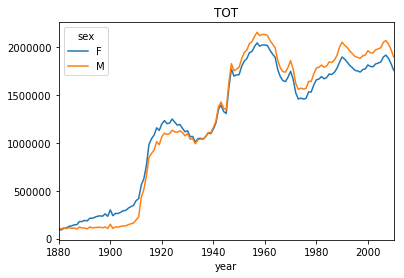

In [81]:
import matplotlib.pyplot as plt
plt.show()

In [85]:
def add_prob(group):
    births = group.births.astype(float)
    
    group['prob'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prob)

In [86]:
import numpy as np
np.allclose(names.groupby(['year', 'sex']).prob.sum(), 1)

True

In [92]:
def get_top1000(group):
    return group.sort_values(by='births', ascending = False)[:1000]

In [89]:
grouped = names.groupby(['year', 'sex'])

In [93]:
top1000 = grouped.apply(get_top1000)

In [95]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [96]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

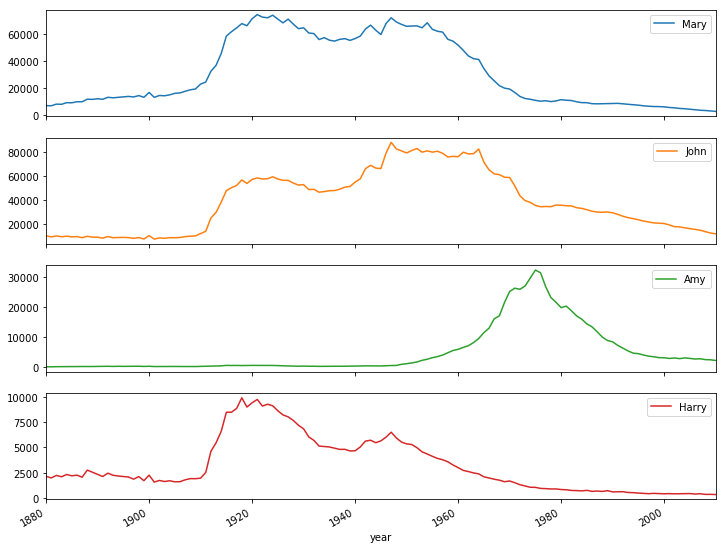

In [100]:
subset = total_births[['Mary', 'John', 'Amy', 'Harry']]

subset.plot(subplots=True, figsize=(12, 10), grid=False)
plt.show()

In [ ]:
# stopped at p37